# Stochastic Gradient Descent SVM
## Madison Chester & Arturo Fredes

This laboratory deals with stochastic subgradient methods in Support Vector Machines.
These methods have been introduced in the Deep Learning course and here we will see how they
are applied to train a Support Vector Machine.


In [1]:
# importing the necessary functions
import numpy as np
import matplotlib.pyplot as plt

## Functions
Next, we defined some functions we will use througout the practical

In [2]:
# Loss function
def f(X,y,w,b,lamb):
    sum_x = 0
    for i in range(X.shape[0]):
        if (y[i] * (w @ X[i] + b) <= 1):
            sum_x = sum_x + 1 - y[i] * (w @ X[i] + b)
    return lamb/2 * w@w + sum_x

The following function is the minibatch algorithm applied to SVM. We did a single function and to do Stochastic gradioent descent we used batch_size = 1 and to do gradient descent batch_size = (number of points)

In [3]:
def sgd_svm(X,y, w0, b0, mu, lamb, epochs, batch_size=1, history = False):
    w = w0
    b = b0
    n_batches = int(np.trunc(X.shape[0]/batch_size)) # get the number of batches
    print('n batches: ', n_batches)
    values = []
    for i in range(epochs):
        #we will start by shuffling data to go through data differently in each epoch
        permutation = np.random.permutation(X.shape[0])
        X_shuffled = X[permutation]
        y_shuffled = y[permutation]
        #we will do as many updates in each epoch as the number  of batches
        for j in range(n_batches):

            # select the data points in the batch
            x_batch = X_shuffled[j*batch_size : (j+1)*batch_size]
            y_batch = y_shuffled[j*batch_size : (j+1)*batch_size]

            #compute the sums
            sum_w = np.zeros(w.shape[0])
            sum_b = 0
            for k in range(batch_size):
                if (y_batch[k] * (w @ x_batch[k] + b) <= 1):
                    sum_w = sum_w - y_batch[k]*x_batch[k]
                    sum_b = sum_b - y_batch[k]
                    
            #update parameters
            w = w - (lamb*w + sum_w)/mu
            b = b - sum_b/mu
    
        # update mu as it says in the instructions
        mu = mu + 0.1
        values.append(f(X,y,w,b,lamb))
    if history == True:
        return w, b, values
    else:
        return w, b

Finally, we defined a function to plot the data and boundary

In [4]:
def plot_boundary(X, y, w, b):
    # plot the data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o', s=100)

    # plot the decision boundary
    xx, yy = np.meshgrid(np.linspace(-2, 8, 100), np.linspace(-2, 10, 100))
    zz = w[0] * xx + w[1] * yy + b
    plt.contour(xx, yy, zz, levels=[0], linewidths=2, colors='black')

    # plot the margins
    plt.contour(xx, yy, zz , levels=[-1], linestyles='dashed', linewidths=1, colors='blue')
    plt.contour(xx, yy, zz , levels=[1], linestyles='dashed', linewidths=1, colors='red')

    plt.title('SVM Decision Boundary and Margins')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

## Generating data and initializing parameters

Before doing the different experiments we initialized data and parameters, so they would be common to all experiments

In [5]:
# generate a separable dataset
X1 = np.random.randn(100, 2) 
X2 = np.random.randn(100, 2) + [5, 6]
X = np.vstack([X1, X2])
y = np.array([1] * 100 + [-1] * 100)

In [6]:
# Initialize parameters
mu = 100
lamb = 1e-4
w0 = np.random.rand(X.shape[1])
b0 = np.random.rand(1)[0]
epochs =100

## Experiment 1: Stochastic Gradient Descent

We started by testing the stochastic gradient descent. For this method, we randomly select a point in each epoch we go through all the points and go in the direction of the gradient evaluated at each of the points. We can see that we are able to find the solution.

n batches:  200


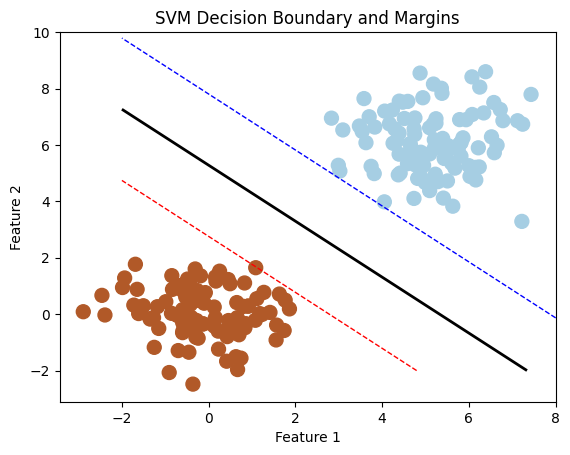

In [7]:

w, b , history_sgd = sgd_svm(X,y, w0, b0, mu, lamb, epochs = epochs, batch_size=1, history = True)
plot_boundary(X,y,w,b)

## Experiment 2: Mini-batch 
Next, we tried minibatch, where we follow the direction given by evaluating the gradient at a batch of points. We used batch sizes of 10, 20 and 50

n batches:  20


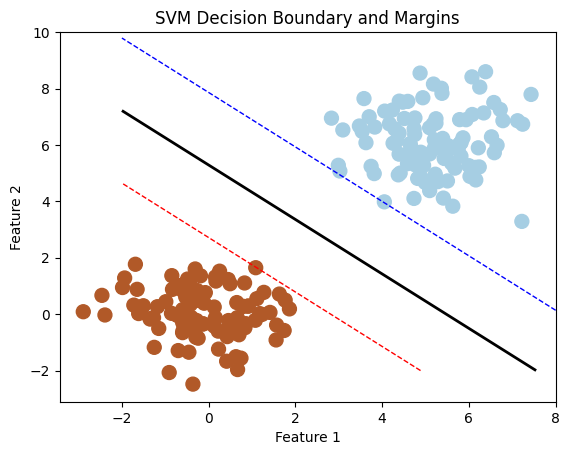

In [8]:
w, b , history10 = sgd_svm(X,y, w0, b0, mu, lamb, epochs = epochs, batch_size=10, history = True)
plot_boundary(X,y,w,b)

n batches:  10


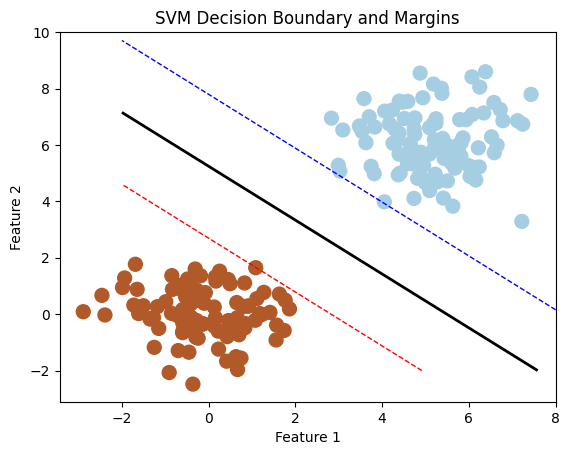

In [9]:
w, b , history20 = sgd_svm(X,y, w0, b0, mu, lamb, epochs = epochs, batch_size=20, history = True)
plot_boundary(X,y,w,b)

n batches:  4


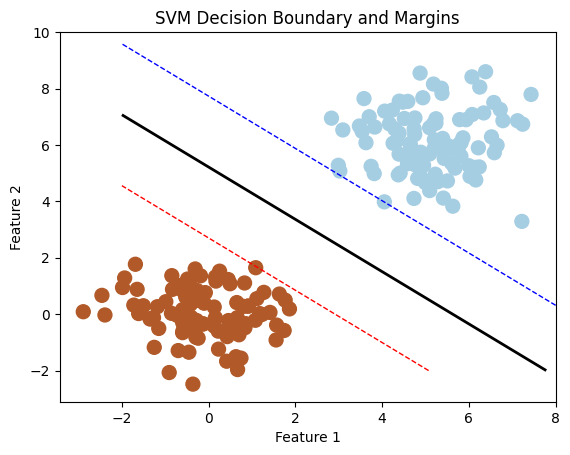

In [10]:
w, b , history50 = sgd_svm(X,y, w0, b0, mu, lamb, epochs = epochs, batch_size=50, history = True)
plot_boundary(X,y,w,b)

In the following graph, we can see that as the batch size increases, the algorithm converges in less epochs, since we are getting closer to the steepest descent direction by leveraging more points.

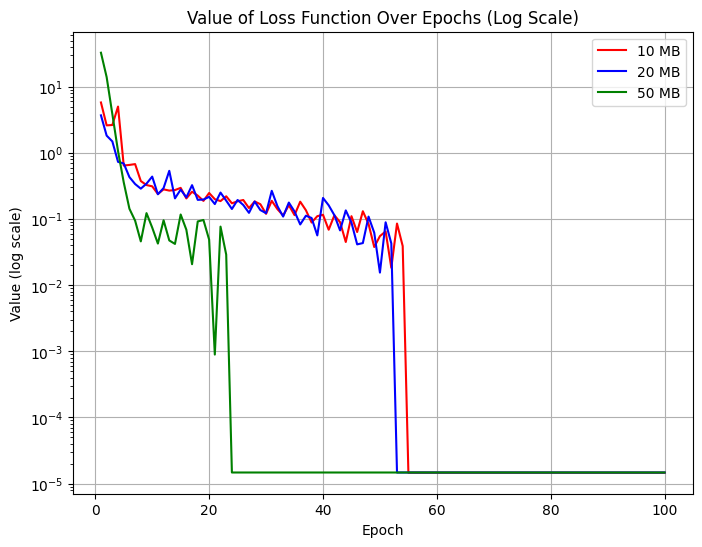

In [11]:
eps = range(1, epochs + 1)
plt.figure(figsize=(8, 6))
plt.plot(eps, history10,  color='red', label = '10 MB')
plt.plot(eps, history20,  color='blue', label = '20 MB')
plt.plot(eps, history50, color='green', label = '50 MB')
plt.yscale('log')  # Set the y-axis to logarithmic scale
plt.xlabel('Epoch')
plt.ylabel('Value (log scale)')
plt.title('Value of Loss Function Over Epochs (Log Scale)')
plt.grid(True)
plt.legend()
plt.show()

## Experiment 3: Gradient Descent

Finally, we used all the points, equivalent to doing gradient descent.

In [12]:
X.shape

(200, 2)

n batches:  1


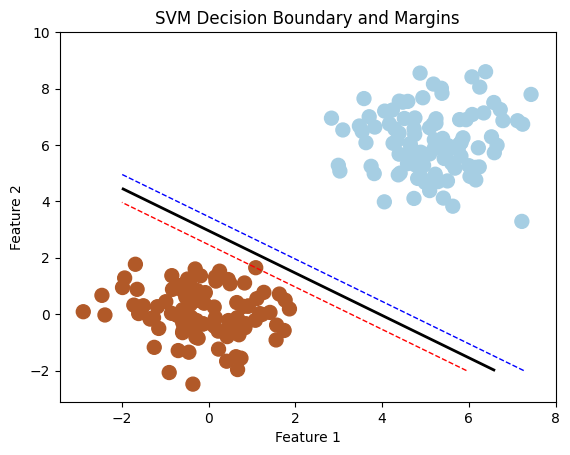

In [15]:
w, b , history_gd = sgd_svm(X,y, w0, b0, mu = mu, lamb = lamb, epochs = epochs, batch_size = X.shape[0], history = True)
plot_boundary(X,y,w,b)

## Comparison between the three methods

In a different experiment we did, we saw the following. We can see how using the gradient descent method, we get stuck. This does not happen with the stochastic methods, since they are less likely to stay in this local minima. Again, we can see that as the batch size grows, the algorithm converges faster, since we are approximating the steepest descent direction

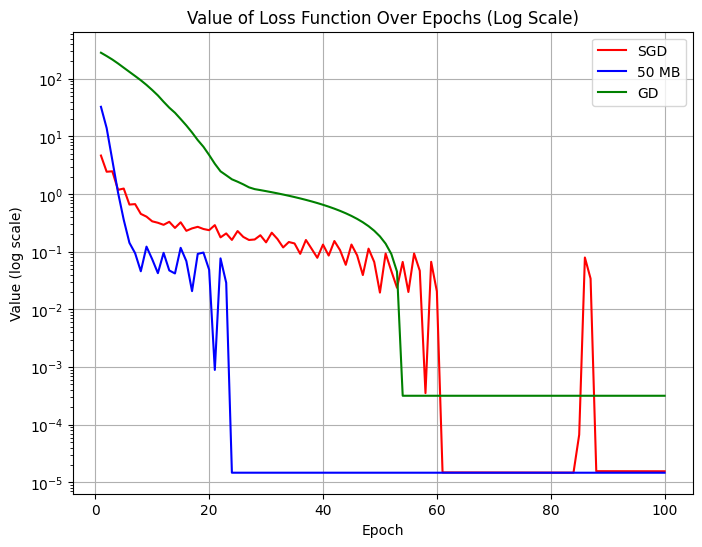

In [16]:
eps = range(1, epochs + 1)
plt.figure(figsize=(8, 6))
plt.plot(eps, history_sgd,  color='red', label = 'SGD')
plt.plot(eps, history50,  color='blue', label = '50 MB')
plt.plot(eps, history_gd, color='green', label = 'GD')
plt.yscale('log')  # Set the y-axis to logarithmic scale
plt.xlabel('Epoch')
plt.ylabel('Value (log scale)')
plt.title('Value of Loss Function Over Epochs (Log Scale)')
plt.grid(True)
plt.legend()
plt.show()